# Second stage of preprocessing satellite data

Satellite data needs to be transformed from Matlab format to table (pandas DataFrame). 
- The first step is a combination of variables into DataFrame with arrays in WWLLN column. This is done beforehand.
- The second step is transformation of WWLLN array to 14 WWLLN variables. This stage is described in the notebook.

In [1]:
import numpy as np
import pandas as pd

## Loading data

In [2]:
#df_raw = pd.read_parquet('F:/2024_Lightning_Analysis/FY-2E_data/data_extracted\\around_station_small.parquet')
#df_raw = pd.read_parquet('F:/2024_Lightning_Analysis/FY-2E_data/data_extracted\\2018_part_0_small_ALL_data_with_lightning.parquet')
df_raw = pd.read_parquet('F:/2024_Lightning_Analysis/FY-2E_data/data_extracted\\around_station_2018_part_3_of_6_small.parquet')

In [3]:
print(df_raw.shape)

(137172, 25)


In [4]:
df_raw.head(6)

File_Name  Cloud_Number        Area  Center_lonlat_1  Center_lonlat_2  \
0  20180501_0930          1107  474.714291        40.995533        37.647865   
1  20180501_0930          1107  474.714291        40.995533        37.647865   
2  20180501_0930          1107  474.714291        40.995533        37.647865   
3  20180501_0930          1107  474.714291        40.995533        37.647865   
4  20180501_0930          1107  474.714291        40.995533        37.647865   
5  20180501_0930          1107  474.714291        40.995533        37.647865   

   Eccentricity  Orientation     TBBmax    TBBmean  TBBmedian  ...  Minute  \
0      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    18.0   
1      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    20.0   
2      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    20.0   
3      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    20.0   
4      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    20.0   
5      0.833665    13.722172 -32.010998 -36.487572 -35.158001  ...    21.0   

      Second  Latitude  Longitude  Error of location  Number of discharges  \
0  15.470687   37.7383    40.9038               12.7                   5.0   
1  32.790843   37.5734    41.0306               20.9                   7.0   
2  33.086162   37.5874    40.9316                7.8                   7.0   
3  54.272556   37.5728    41.0188               20.6                   7.0   
4  54.406711   37.5813    40.9499                6.8                   5.0   
5  24.940198   37.5872    40.9433               15.3                   6.0   

   Number of day  Lightning is in cloud  Lightning is in ellipse  \
0  737181.387679                    0.0                      1.0   
1  737181.389268                    0.0                      1.0   
2  737181.389272                    0.0                      1.0   
3  737181.389517                    0.0                      1.0   
4  737181.389519                    0.0                      1.0   
5  737181.389872                    0.0                      1.0   

   TBB near lightning  
0          -37.553005  
1          -33.460995  
2          -39.820995  
3          -35.158001  
4          -39.820995  
5          -39.820995  

[6 rows x 25 columns]

In [35]:
df_raw.tail(6)

File_Name  Cloud_Number        Area  Center_lonlat_1  \
657093  20180103_1930          5990  837.978978        44.052376   
657094  20180103_1930          5990  837.978978        44.052376   
657095  20180103_1930          5990  837.978978        44.052376   
657096  20180103_1930          5991  444.055178        73.096878   
657097  20180103_1930          5991  444.055178        73.096878   
657098  20180103_1930          5991  444.055178        73.096878   

        Eccentricity  Orientation     TBBmax    TBBmean  TBBmedian     TBBmin  \
657093    -18.654289     0.934884 -53.417923 -32.029995 -44.721828 -45.498501   
657094    -18.654289     0.934884 -53.417923 -32.029995 -44.721828 -45.498501   
657095    -18.654289     0.934884 -53.417923 -32.029995 -44.721828 -45.498501   
657096    -25.858814     0.760492   2.677390 -32.029995 -34.114071 -33.832500   
657097    -25.858814     0.760492   2.677390 -32.029995 -34.114071 -33.832500   
657098    -25.858814     0.760492   2.677390 -32.029995 -34.114071 -33.832500   

        ...  Minute     Second  Latitude  Longitude  Error of location  \
657093  ...    38.0  52.311108  -18.6088    43.9812               10.9   
657094  ...    40.0  55.052899  -18.5256    44.1762               13.9   
657095  ...    47.0  57.187443  -18.5102    44.2318               14.1   
657096  ...    24.0  39.255217  -25.8259    72.9891                9.0   
657097  ...    24.0  39.255221  -25.9135    73.0154               20.7   
657098  ...    27.0  28.186974  -25.8836    72.9547               21.6   

        Number of discharges  Number of day  Lightning is in cloud  \
657093                   5.0  737063.818661                    0.0   
657094                   6.0  737063.820082                    0.0   
657095                   6.0  737063.824967                    0.0   
657096                   7.0  737063.808788                    0.0   
657097                   5.0  737063.808788                    0.0   
657098                  10.0  737063.810743                    0.0   

        Lightning is in ellipse  TBB near lightning  
657093                      1.0          -51.271999  
657094                      1.0          -37.169003  
657095                      1.0          -32.029995  
657096                      1.0          -34.240993  
657097                      1.0          -35.902004  
657098                      1.0          -33.424007  

[6 rows x 25 columns]

In [19]:
df_raw['Month']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
657094    1.0
657095    1.0
657096    1.0
657097    1.0
657098    1.0
Name: Month, Length: 657099, dtype: float64

## Ploting global distribution of Centers of Clouds

In [5]:
# Define the coordinates of the station (center) and the tolerance for the rectangle (in degrees)
station_latitude = 40.4713
station_longitude = 44.1819
frame_tolerance = 7 # Adjust this value as needed for the ±N degree range
rectangle_tolerance = 5  # ±1 degree for the rectangle

# Define the bounding box
min_latitude = station_latitude - frame_tolerance
max_latitude = station_latitude + frame_tolerance
min_longitude = station_longitude - frame_tolerance
max_longitude = station_longitude + frame_tolerance

In [6]:
import plotly.express as px
import plotly.graph_objects as go

def plot_cloud_centers_with_station(df, station_latitude, station_longitude, frame_half_size, rectangle_half_size):
    """
    Plots cloud centers with a station marker and a rectangular region around the station.
    
    Parameters:
    - df: The DataFrame containing the cloud data with 'Center_lonlat_1' for longitude and 'Center_lonlat_2' for latitude.
    - station_latitude: Latitude of the station to plot.
    - station_longitude: Longitude of the station to plot.
    - frame_half_size: Half the size of the frame window (± in degrees) around the station to zoom in on. Default is 5 degrees.
    - rectangle_half_size: Half the size of the rectangle (± in degrees) to plot around the station. Default is 1 degree.
    """
    
    # Create a scatter plot with cloud centers using scatter_geo
    fig = px.scatter_geo(
        df,
        lat='Center_lonlat_2',  # Use Center_lonlat_2 for latitude
        lon='Center_lonlat_1',  # Use Center_lonlat_1 for longitude
        title="Centers of Clouds",
        height=800,  # Increase height for better resolution
        width=1200,  # Increase width for better resolution
    )

    # Update marker size and layout
    fig.update_traces(
        marker=dict(size=2),  # Make markers smaller by adjusting size
    )

    # Add the station's marker (red dot, 10 times smaller than before)
    fig.add_trace(go.Scattergeo(
        lat=[station_latitude],
        lon=[station_longitude],
        mode='markers',
        marker=dict(size=4, color='red'),  # Smaller marker for the station
        name="Station Location"
    ))

    # Define the coordinates for the rectangle (corners of the bounding box)
    corner_lons = [
        station_longitude - rectangle_half_size,  # left
        station_longitude + rectangle_half_size,  # right
        station_longitude + rectangle_half_size,  # right
        station_longitude - rectangle_half_size,  # left
        station_longitude - rectangle_half_size,  # left (close the rectangle)
    ]
    corner_lats = [
        station_latitude - rectangle_half_size,  # bottom
        station_latitude - rectangle_half_size,  # bottom
        station_latitude + rectangle_half_size,  # top
        station_latitude + rectangle_half_size,  # top
        station_latitude - rectangle_half_size,  # bottom (close the rectangle)
    ]
    
    # Add lines for the rectangle borders (red color)
    fig.add_trace(go.Scattergeo(
        lat=corner_lats,
        lon=corner_lons,
        mode='lines',
        line=dict(color='red', width=2),  # Red border for the rectangle
        name=f"{rectangle_half_size}° Rectangle"
    ))

    # Update layout to zoom into the station's area (± frame_half_size)
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth',  # Projection type
            lonaxis=dict(range=[station_longitude - frame_half_size, station_longitude + frame_half_size]),  # ± frame_half_size degrees range in longitude
            lataxis=dict(range=[station_latitude - frame_half_size, station_latitude + frame_half_size]),  # ± frame_half_size degrees range in latitude
        ),
        title="Centers of Clouds with Station and Rectangle",
        margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Reduce margins
    )

    # Show the plot
    fig.show()

In [8]:
plot_cloud_centers_with_station(df_raw, station_latitude, station_longitude, frame_tolerance, rectangle_tolerance)

### Adding elevation map

In [26]:
import srtm

def get_elevation_data(lat_range, lon_range):
    # Initialize the SRTM data downloader
    srtm_data = srtm.get_data()

    # Create a grid of latitudes and longitudes
    latitudes = np.linspace(lat_range[0], lat_range[1], 100)  # Adjust resolution as needed
    longitudes = np.linspace(lon_range[0], lon_range[1], 100)

    # Create elevation data grid
    elevation_data = np.array([[srtm_data.get_elevation(lat, lon) for lon in longitudes] for lat in latitudes])

    return elevation_data, latitudes, longitudes

# Example usage
lat_range = (min_latitude, max_latitude)  # Define latitude range
lon_range = (min_longitude, max_longitude)  # Define longitude range
elevation_data, lats_grid, lons_grid = get_elevation_data(lat_range, lon_range)   # in what follows we use another lats_, lons_grid

elevation_data = np.array(elevation_data)

# Ensure all values are numeric, and replace invalid entries with NaN or a default value
elevation_data = pd.to_numeric(elevation_data.flatten(), errors='coerce').reshape(elevation_data.shape)

# Optional: Replace NaN values with a default (e.g., 0 or the mean elevation)
elevation_data = np.nan_to_num(elevation_data, nan=0)  # Replace NaN with 0, adjust as needed


In [27]:
# Assuming you have elevation_data, lats, and lons as 1D arrays:
# lats_range and lons_range should be the ranges of latitudes and longitudes.
num_lat_points = 100  # Number of latitude points
num_lon_points = 100  # Number of longitude points

# Generate linearly spaced latitude and longitude arrays
latitudes = np.linspace(min_latitude, max_latitude, num_lat_points)
longitudes = np.linspace(min_longitude, max_longitude, num_lon_points)

# Create a meshgrid (2D grid of lat/lon values)
lats_grid, lons_grid = np.meshgrid(latitudes, longitudes)

In [28]:
# Подкладываем карту высот
import plotly.express as px
import plotly.graph_objects as go

def plot_cloud_centers_with_station_and_elevation(df, station_latitude, station_longitude, frame_half_size, rectangle_half_size, elevation_data, lats_grid, lons_grid):
    """
    Plots cloud centers with a station marker, a rectangular region around the station, and elevation data as a colored background.
    
    Parameters:
    - df: The DataFrame containing the cloud data with 'Center_lonlat_1' for longitude and 'Center_lonlat_2' for latitude.
    - station_latitude: Latitude of the station to plot.
    - station_longitude: Longitude of the station to plot.
    - frame_half_size: Half the size of the frame window (± in degrees) around the station to zoom in on. Default is 5 degrees.
    - rectangle_half_size: Half the size of the rectangle (± in degrees) to plot around the station. Default is 1 degree.
    - elevation_data: 2D array of elevation data corresponding to the lats_grid and lons_grid.
    - lats_grid: 2D array of latitudes corresponding to the elevation data.
    - lons_grid: 2D array of longitudes corresponding to the elevation data.
    """
    
    # Step 1: Create a scatter plot with cloud centers using scatter_geo
    fig = px.scatter_geo(
        df,
        lat='Center_lonlat_2',  # Use Center_lonlat_2 for latitude
        lon='Center_lonlat_1',  # Use Center_lonlat_1 for longitude
        title="Centers of Clouds with Elevation Background",
        height=800,  # Increase height for better resolution
        width=1200,  # Increase width for better resolution
    )

    # Update marker size and layout
    fig.update_traces(
        marker=dict(size=2),  # Make markers smaller by adjusting size
    )

    # Step 2: Add the station's marker (red dot, 10 times smaller than before)
    fig.add_trace(go.Scattergeo(
        lat=[station_latitude],
        lon=[station_longitude],
        mode='markers',
        marker=dict(size=4, color='red'),  # Smaller marker for the station
        name="Station Location"
    ))

    # Step 3: Define the coordinates for the rectangle (corners of the bounding box)
    corner_lons = [
        station_longitude - rectangle_half_size,  # left
        station_longitude + rectangle_half_size,  # right
        station_longitude + rectangle_half_size,  # right
        station_longitude - rectangle_half_size,  # left
        station_longitude - rectangle_half_size,  # left (close the rectangle)
    ]
    corner_lats = [
        station_latitude - rectangle_half_size,  # bottom
        station_latitude - rectangle_half_size,  # bottom
        station_latitude + rectangle_half_size,  # top
        station_latitude + rectangle_half_size,  # top
        station_latitude - rectangle_half_size,  # bottom (close the rectangle)
    ]
    
    # Step 4: Add lines for the rectangle borders (red color)
    fig.add_trace(go.Scattergeo(
        lat=corner_lats,
        lon=corner_lons,
        mode='lines',
        line=dict(color='red', width=2),  # Red border for the rectangle
        name=f"{rectangle_half_size}° Rectangle"
    ))

    # Step 5: Add elevation data as a colored background (using a heatmap)

    # Make sure elevation_data is also a 2D array that matches the shape of the grid
    # It should have the same dimensions as lats_grid and lons_grid.
    # Example:
    # elevation_data should already be a 2D array of shape (n_lats, n_lons)

    # Add the heatmap trace with elevation data
    fig.add_trace(go.Heatmap(
        z=elevation_data,  # Elevation values (2D array)
        lat=lats_grid.flatten(),  # Flatten 2D grids for latitudes
        lon=lons_grid.flatten(),  # Flatten 2D grids for longitudes
        colorscale='Viridis',  # Set the colorscale
        opacity=0.6,  # Set opacity
        zmin=np.min(elevation_data),  # Set minimum elevation value
        zmax=np.max(elevation_data),  # Set maximum elevation value
        name="Elevation"
    ))
        # Step 6: Update layout to zoom into the station's area (± frame_half_size)
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth',  # Projection type
            lonaxis=dict(range=[station_longitude - frame_half_size, station_longitude + frame_half_size]),  # ± frame_half_size degrees range in longitude
            lataxis=dict(range=[station_latitude - frame_half_size, station_latitude + frame_half_size]),  # ± frame_half_size degrees range in latitude
        ),
        title="Centers of Clouds with Station, Rectangle, and Elevation Data",
        margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Reduce margins
    )

    fig.show()

In [25]:
elevation_data

array([[723, 674, 640, ..., 2180, 2217, 2035],
       [764, 707, 690, ..., 2032, 2246, 2799],
       [722, 743, 777, ..., 1879, 2060, 2397],
       ...,
       [139, 152, 80, ..., -29, -28, -28],
       [195, 155, 44, ..., -25, -25, -27],
       [185, 204, 152, ..., -26, -25, -26]], dtype=object)

In [29]:
plot_cloud_centers_with_station_and_elevation(df_raw, station_latitude, station_longitude, frame_tolerance, rectangle_tolerance, elevation_data, lats_grid, lons_grid)

ValueError: Invalid property specified for object of type plotly.graph_objs.Heatmap: 'lat'

Did you mean "dx"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.heatmap.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use `zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data are filled in. It is defaulted
            to true if `z` is a one dimensional array and `zsmooth`
            is not false; otherwise it is defaulted to false.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.heatmap.Hoverlabel`
            instance or dict with compatible properties
        hoverongaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data have hover labels associated
            with them.
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.heatmap.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.heatmap.Stream` instance
            or dict with compatible properties
        text
            Sets the text elements associated with each z value.
        textfont
            Sets the text font.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `x`, `y`, `z` and `text`.
        transpose
            Transposes the z data.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xgap
            Sets the horizontal gap (in pixels) between bricks.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        xtype
            If "array", the heatmap's x coordinates are given by
            "x" (the default behavior when `x` is provided). If
            "scaled", the heatmap's x coordinates are given by "x0"
            and "dx" (the default behavior when `x` is not
            provided).
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ygap
            Sets the vertical gap (in pixels) between bricks.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        ytype
            If "array", the heatmap's y coordinates are given by
            "y" (the default behavior when `y` is provided) If
            "scaled", the heatmap's y coordinates are given by "y0"
            and "dy" (the default behavior when `y` is not
            provided)
        z
            Sets the z data.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax` Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see: https://github.com/d
            3/d3-format/tree/v1.4.5#d3-format.By default the values
            are formatted using generic number format.
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zsmooth
            Picks a smoothing algorithm use to smooth `z` data.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "dx"?

Bad property path:
lat
^^^

## Ploting distribution of number of strokes

All clouds

In [17]:
# Group by 'Cloud_Number' and count the lightning discharges per cloud
lightning_counts = df_raw.groupby('Cloud_Number').size()

# View the first few rows of lightning counts
print(lightning_counts.head())

Cloud_Number
106     3
686     2
787     1
874     1
1060    5
dtype: int64


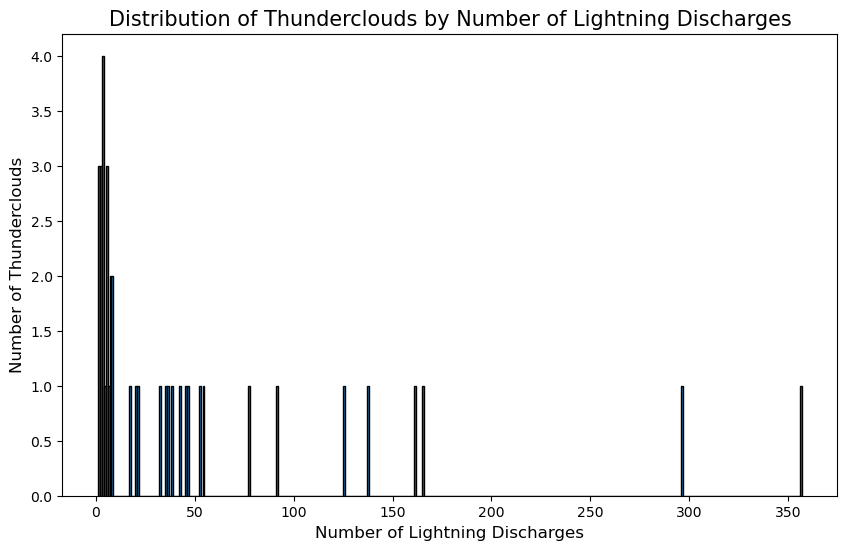

In [18]:
import matplotlib.pyplot as plt

# Create a histogram of lightning discharges per cloud
plt.figure(figsize=(10, 6))
plt.hist(lightning_counts, bins=range(1, lightning_counts.max() + 1), edgecolor='black')

# Add titles and labels
plt.title('Distribution of Thunderclouds by Number of Lightning Discharges', fontsize=15)
plt.xlabel('Number of Lightning Discharges', fontsize=12)
plt.ylabel('Number of Thunderclouds', fontsize=12)

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

# Create a bar plot of the counts of lightning discharges per cloud
plt.figure(figsize=(12, 6))
sns.countplot(x=lightning_counts, palette='Blues')

# Add titles and labels
plt.title('Distribution of Thunderclouds by Number of Lightning Discharges', fontsize=15)
plt.xlabel('Number of Lightning Discharges', fontsize=12)
plt.ylabel('Number of Thunderclouds', fontsize=12)

# Show the plot
plt.show()

Typical clouds only - not too high and not too low lightning rate

In [ ]:
# Group by 'Cloud_Number' and count the lightning discharges per cloud
lightning_counts = df_raw.groupby('Cloud_Number').size()

# Sort the counts to get a sense of distribution
lightning_counts_sorted = lightning_counts.sort_values()

# Calculate the 10th and 90th percentiles for the counts
lower_bound = lightning_counts_sorted.quantile(0.10)
upper_bound = lightning_counts_sorted.quantile(0.90)

# Filter clouds to keep only those with counts between the 10th and 90th percentiles
filtered_lightning_counts = lightning_counts_sorted[
    (lightning_counts_sorted > lower_bound) & (lightning_counts_sorted < upper_bound)
]

# View the filtered lightning counts
print(filtered_lightning_counts.head())

# Optionally, plot the distribution for visual understanding
filtered_lightning_counts.hist(bins=20)  # Adjust the bins as needed for better visualization


Static plot

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the filtered lightning counts
plt.figure(figsize=(10, 6))
plt.hist(filtered_lightning_counts, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Lightning Discharges (Filtered 80%)', fontsize=16)
plt.xlabel('Number of Lightning Discharges', fontsize=14)
plt.ylabel('Number of Clouds', fontsize=14)

# Show the plot
plt.show()


Interactive plot

In [ ]:
import plotly.express as px

# Create an interactive histogram of the filtered lightning counts
fig = px.histogram(
    filtered_lightning_counts,
    nbins=20,  # Adjust the number of bins as necessary
    title='Distribution of Lightning Discharges (Filtered 80%)',
    labels={'value': 'Number of Lightning Discharges', 'count': 'Number of Clouds'},
    height=600, width=800
)

# Add axis labels
fig.update_layout(
    xaxis_title="Number of Lightning Discharges",
    yaxis_title="Number of Clouds",
    bargap=0.1  # Adjust bar gap
)

# Show the plot
fig.show()


## Choosing clouds in the region around Station

In [10]:
station_latitude = 40.4713
station_longitude = 44.1819
station_tolerance = 5  # Adjustable for any other degree range

# Define the bounding box
min_latitude = station_latitude - station_tolerance
max_latitude = station_latitude + station_tolerance
min_longitude = station_longitude - station_tolerance
max_longitude = station_longitude + station_tolerance

In [10]:
cloud_groups = df_raw.groupby('Cloud_Number')

# Define a function to check if a cloud is always within the bounding box
def is_always_in_box(cloud_df):
    return ((cloud_df['Latitude'] >= min_latitude) & (cloud_df['Latitude'] <= max_latitude) &
            (cloud_df['Longitude'] >= min_longitude) & (cloud_df['Longitude'] <= max_longitude)).all()

# Filter the clouds: keep only clouds that are always within the bounding box
filtered_clouds = cloud_groups.filter(is_always_in_box)

In [17]:
# Total number of unique clouds in the initial DataFrame
total_clouds = df_raw['Cloud_Number'].nunique()

# Number of unique clouds in the filtered data
filtered_cloud_count = filtered_clouds['Cloud_Number'].nunique()

# Calculate the number of excluded clouds
excluded_cloud_count = total_clouds - filtered_cloud_count

# Output the results to the console
print(f"Total number of clouds in the initial Parquet: {total_clouds}")
print(f"Number of clouds within the rectangle (filtered): {filtered_cloud_count}")
print(f"Number of clouds excluded (not always in the rectangle): {excluded_cloud_count}")

Total number of clouds in the initial Parquet: 5991
Number of clouds within the rectangle (filtered): 37
Number of clouds excluded (not always in the rectangle): 5954


Wrapping the above to a function for getting clouds just within the Station region from the global dataset:

In [11]:
def make_filtered_clouds(df_raw, station_latitude, station_longitude, region_half_size):
    """
    Filters the clouds in the DataFrame, keeping only those clouds that are always within the bounding box
    defined by station coordinates and the frame_half_size tolerance.

    Parameters:
    - df_raw: The raw DataFrame containing the cloud data, including 'Latitude', 'Longitude', and 'Cloud_Number'.
    - station_latitude: The latitude of the station.
    - station_longitude: The longitude of the station.
    - frame_half_size: The half-size (in degrees) of the bounding box around the station within which clouds are kept.

    Returns:
    - filtered_clouds: A DataFrame containing clouds that are always within the bounding box.
    """

    # Define the bounding box based on station coordinates and frame_half_size
    min_latitude = station_latitude - region_half_size
    max_latitude = station_latitude + region_half_size
    min_longitude = station_longitude - region_half_size
    max_longitude = station_longitude + region_half_size

    # Group the data by 'Cloud_Number'
    cloud_groups = df_raw.groupby('Cloud_Number')

    # Define a function to check if a cloud is always within the bounding box
    def is_always_in_box(cloud_df):
        return ((cloud_df['Latitude'] >= min_latitude) & (cloud_df['Latitude'] <= max_latitude) &
                (cloud_df['Longitude'] >= min_longitude) & (cloud_df['Longitude'] <= max_longitude)).all()

    # Filter the clouds: keep only clouds that are always within the bounding box
    filtered_clouds = cloud_groups.filter(is_always_in_box)

    # Calculate total clouds and filtered clouds
    total_clouds = df_raw['Cloud_Number'].nunique()
    filtered_cloud_count = filtered_clouds['Cloud_Number'].nunique()
    excluded_cloud_count = total_clouds - filtered_cloud_count

    # Output the results to the console
    print(f"Total number of clouds in the initial DataFrame: {total_clouds}")
    print(f"Number of clouds within the rectangle (filtered): {filtered_cloud_count}")
    print(f"Number of clouds excluded (not always in the rectangle): {excluded_cloud_count}")

    return filtered_clouds


In [12]:
filtered_clouds = make_filtered_clouds(df_raw, station_latitude, station_longitude, region_half_size=5)

Total number of clouds in the initial DataFrame: 5991
Number of clouds within the rectangle (filtered): 37
Number of clouds excluded (not always in the rectangle): 5954


In [25]:
plot_cloud_centers_with_station(filtered_clouds, station_latitude, station_longitude, frame_half_size=10, rectangle_half_size=5)